## 1. Loading data

### Import the relevant libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

### Load the data

In [71]:
data = pd.read_csv('Absenteeism_data.csv')
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [72]:
data.tail()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2
699,15,28,31/05/2018,291,31,40,237.656,25,1,1,1,2


In [75]:
#creat a copy of original dataframne
df = data.copy()

In [76]:
#check whether there is a missing value
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

There is no missing value in this dataset which is quite good for analysis

In [77]:
#describe data with numeric features
df.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


There is outlier in Absenteeism Time in Hours column

In [80]:
#checking the shape of the data
df.shape

(700, 12)

Dataset has 700 rows and 12 columns

In [79]:
#checking data information and data type as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


Dataset has 10 columns with int64 datatype, 1 object datatype column, 1 float datatype column

In [9]:
# view the entire of dataframe
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8


In [81]:
# drop ID column as this is not nessessary for analysis later on
df = df.drop(['ID'], axis = 1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [82]:
#check values of reason for absence, there is non value of 20, it ranges from 0 - 28.
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

There are 28 reasons from 1 to 28 but 20

## 2. Explotary Data Analysis

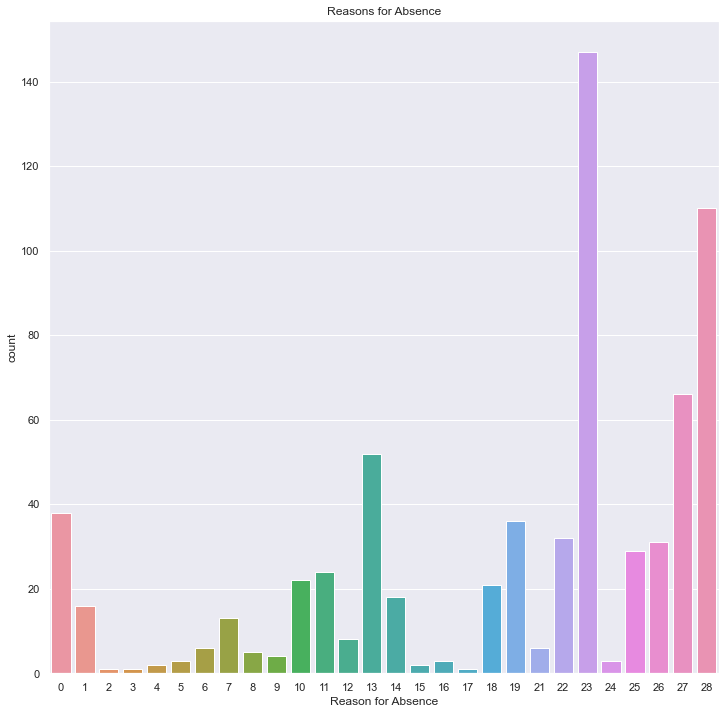

In [83]:
#count plot the data of Reason for Absence column
plt.figure(figsize=(12,12))
ax = sns.countplot(x=df['Reason for Absence'])
ax.set_title('Reasons for Absence')
plt.show()

Top 3 reasons for absent is 23, 28, 27

### Converted Date datatype to datetime datatype

In [84]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         700 non-null    int64         
 1   Reason for Absence         700 non-null    int64         
 2   Date                       700 non-null    datetime64[ns]
 3   Transportation Expense     700 non-null    int64         
 4   Distance to Work           700 non-null    int64         
 5   Age                        700 non-null    int64         
 6   Daily Work Load Average    700 non-null    float64       
 7   Body Mass Index            700 non-null    int64         
 8   Education                  700 non-null    int64         
 9   Children                   700 non-null    int64         
 10  Pets                       700 non-null    int64         
 11  Absenteeism Time in Hours  700 non-null    int64         
dtypes: datet

<AxesSubplot:>

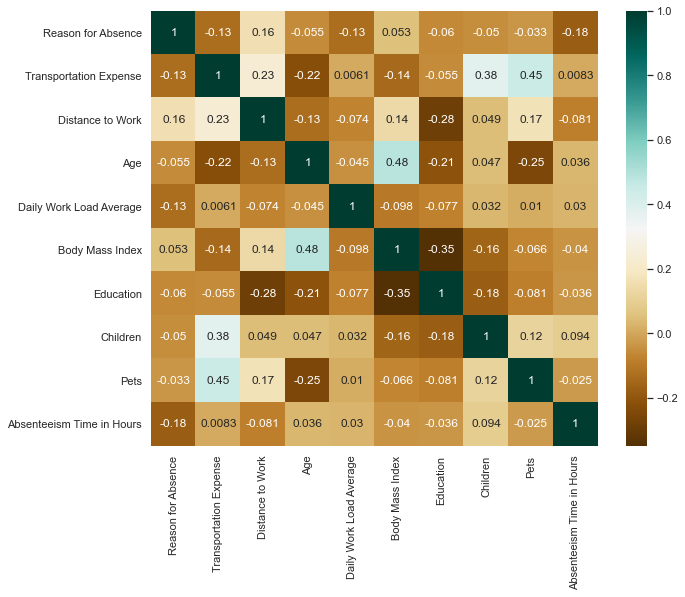

In [85]:
# plot heat map correllation of numeric features
plt.figure(figsize=(10,8))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

As we can see correlation between features are quite small.

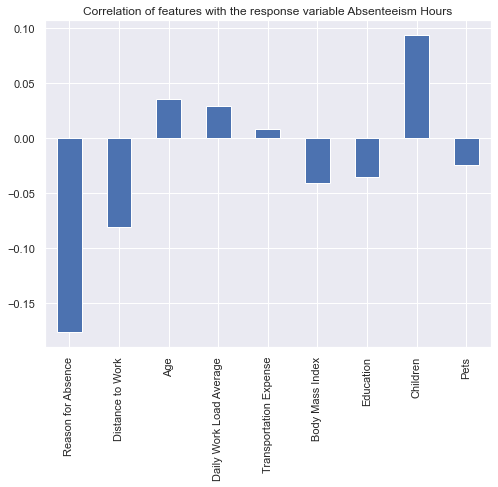

In [86]:
#plot the bar graph to see correlation more clearer
continuous_var = ['Reason for Absence', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Transportation Expense', 'Body Mass Index', 'Education', 'Children', 'Pets']
corr=df[continuous_var].corrwith(df['Absenteeism Time in Hours'])
corr.plot.bar(figsize=(8,6), title='Correlation of features with the response variable Absenteeism Hours', legend=False, style=None, fontsize=None, colormap=None, label=None)
plt.show()

It showing that there are 5 features negative correlation with Absenteeism Hours, and 4 features positive correlation with Absenteeism Hours

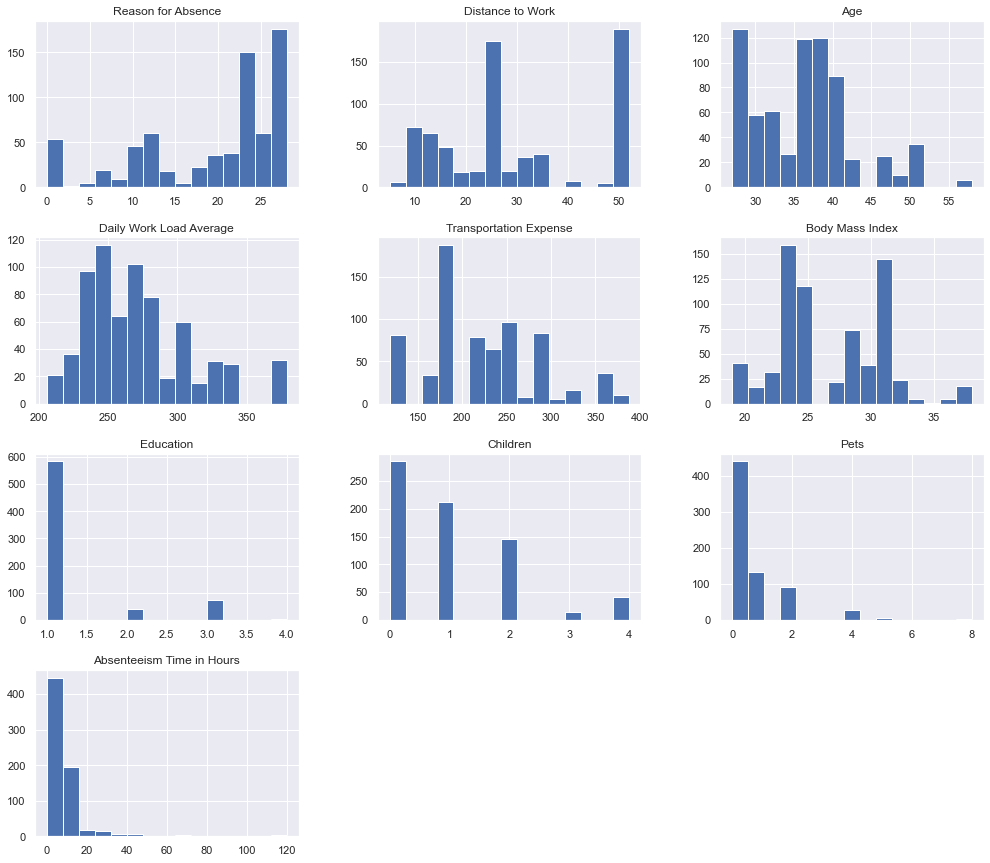

In [87]:
# plot the histogram all of the numeric features
continuous_attributes = ['Reason for Absence', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Transportation Expense', 'Body Mass Index', 'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']
d_f = pd.DataFrame(df[continuous_attributes])
hist = d_f.hist(bins=15, figsize=(17,15))

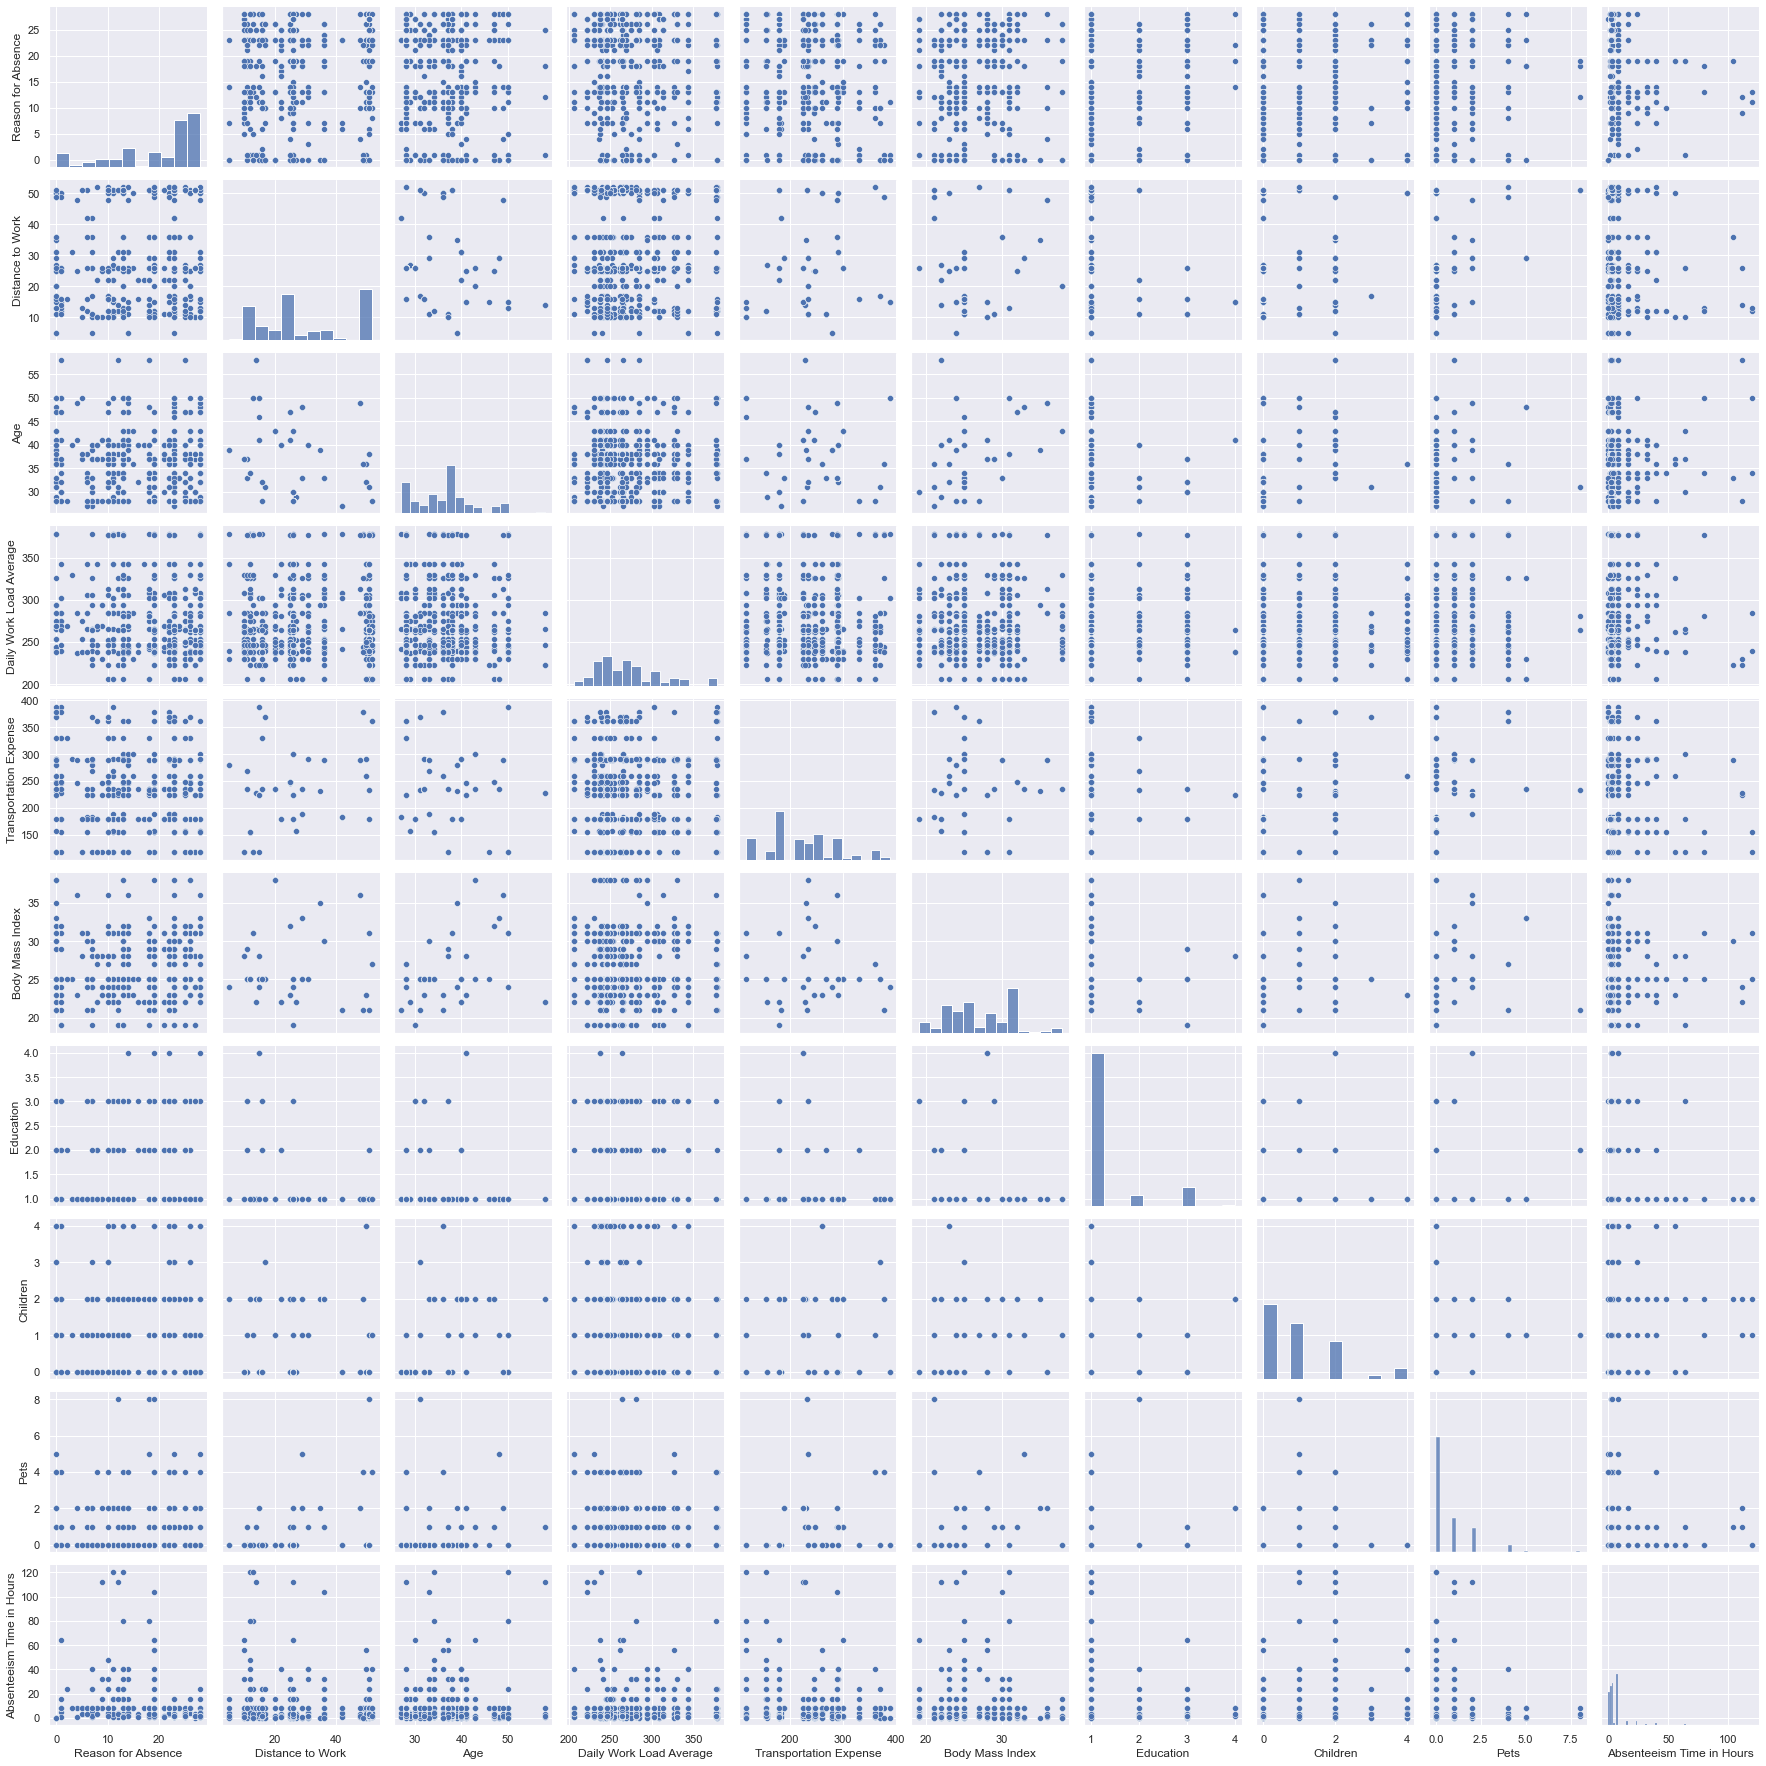

In [88]:
#Visualize the relationship among all continous variables using pairplots
sns.pairplot(df,vars=continuous_attributes)

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


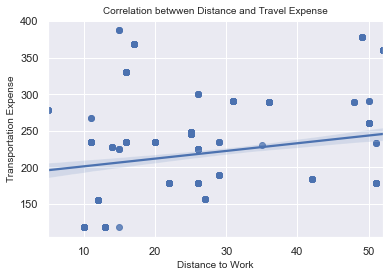

In [89]:
#plot scatter plot Distance to Work and Transportation Expense
sns.regplot(df['Distance to Work'],df['Transportation Expense'])
plt.xlabel('Distance to Work', fontsize = 10)
plt.ylabel('Transportation Expense', fontsize = 10)
plt.title('Correlation betwwen Distance and Travel Expense', fontsize = 10)
plt.show()

It clears that there is relationship between these 2 features

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


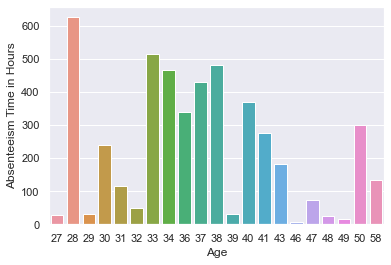

In [90]:
#plot the Age vs Absenteeism Hours
age= df[['Age', 'Absenteeism Time in Hours']].groupby('Age').sum().reset_index()
sns.barplot(age['Age'], age['Absenteeism Time in Hours'])
plt.show()

The age of 28 and 33 to 38 are the most group of age likely to absent at work this maybe because they had to take care of their children or got problem with healthcare

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


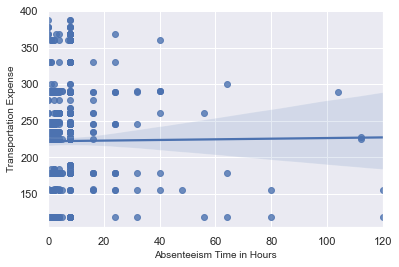

In [22]:
#plot scatter plot Transportation Expense vs Absenteeism Hours
sns.regplot(df['Absenteeism Time in Hours'],df['Transportation Expense'])
plt.xlabel('Absenteeism Time in Hours', fontsize = 10)
plt.ylabel('Transportation Expense', fontsize = 10)
plt.show()

It seem like there is no correllation between transportation expense and absenteeism

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


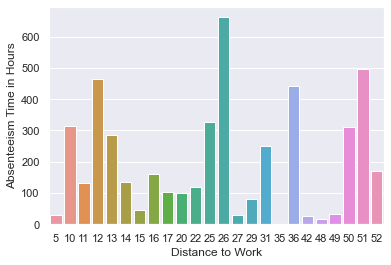

In [6]:

distance= df[['Distance to Work', 'Absenteeism Time in Hours']].groupby('Distance to Work').sum().reset_index()
sns.barplot(distance['Distance to Work'], distance['Absenteeism Time in Hours'])
plt.show()

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


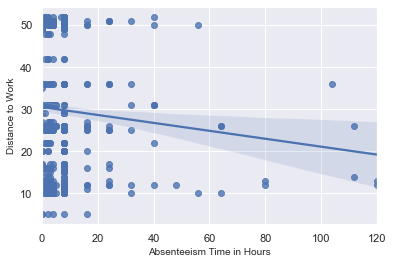

In [24]:
sns.regplot(df['Absenteeism Time in Hours'],df['Distance to Work'])
plt.xlabel('Absenteeism Time in Hours', fontsize = 10)
plt.ylabel('Distance to Work', fontsize = 10)
plt.show()

With this scatter plot it indicates that there is negative relationship between Distance to Work and Absenteeism. However we will have a deeper analysis into these features then

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


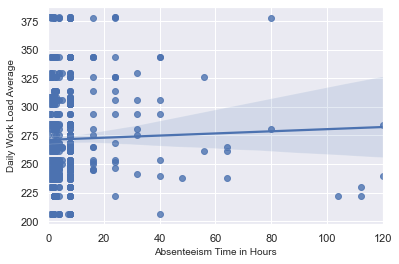

In [25]:
sns.regplot(df['Absenteeism Time in Hours'],df['Daily Work Load Average'])
plt.xlabel('Absenteeism Time in Hours', fontsize = 10)
plt.ylabel('Daily Work Load Average', fontsize = 10)
plt.show()

It seems there is correllation between Daily Work Load Average and Absenteeism

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


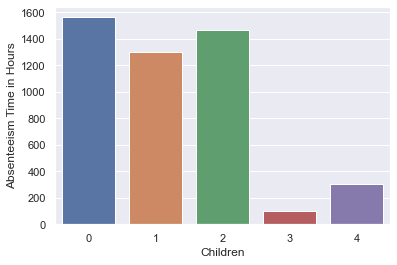

In [101]:
#plot bar plot Childern vs Absenteeism 
Chi= df[['Children', 'Absenteeism Time in Hours']].groupby('Children').sum().reset_index()
sns.barplot(Chi['Children'], Chi['Absenteeism Time in Hours'])
plt.show()

Employee with 3 - 4 children is less likely to absent at work this is might be childerns they are able to take care of each other. Employee without or 1,2 children is more likely to absent from work, this is clear that they need more time to take care of their kids.

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


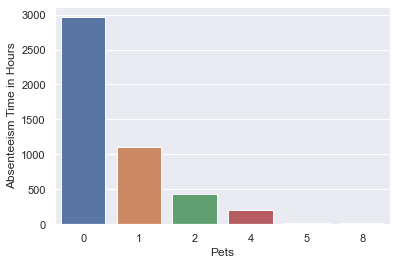

In [104]:
pet= df[['Pets', 'Absenteeism Time in Hours']].groupby('Pets').sum().reset_index()
sns.barplot(pet['Pets'], pet['Absenteeism Time in Hours'])
plt.show()

Employee with no pet is more likely to absent for work

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


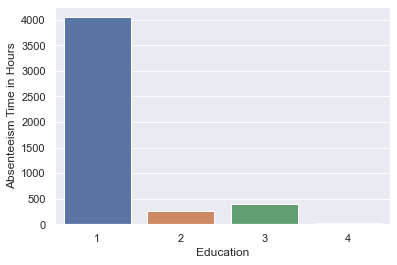

In [108]:
edu= df[['Education', 'Absenteeism Time in Hours']].groupby('Education').sum().reset_index()
sns.barplot(edu['Education'], edu['Absenteeism Time in Hours'])
plt.show()

Employee with education 1 is mostly account for absenteeism hours. This plot is also showing that 1 is for Highschool level in Education, 2: Diploma, Bachelor, 3: Bachelor, 4: Master, PhD.

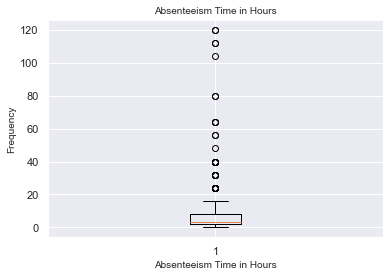

In [27]:
plt.boxplot(df['Absenteeism Time in Hours'])
plt.xlabel('Absenteeism Time in Hours', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('Absenteeism Time in Hours', fontsize = 10)

plt.show()

The plot above showing median of the absenteeism Time is 3 hours. 50% of hours ranges from 2 to 8

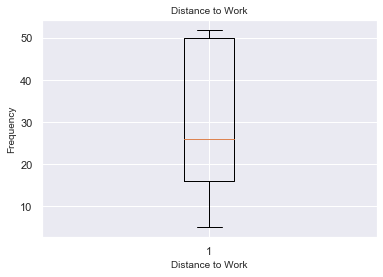

In [28]:
plt.boxplot(df['Distance to Work'])
plt.xlabel('Distance to Work', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('Distance to Work', fontsize = 10)

plt.show()

The plot above showing median of the distance to work is 26km. 50% of distance ranges from 16 to 50

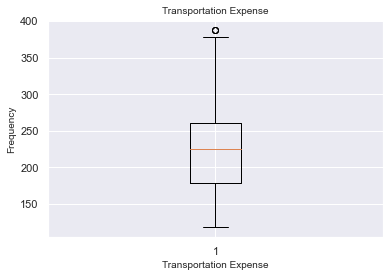

In [29]:
plt.boxplot(df['Transportation Expense'])
plt.xlabel('Transportation Expense', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('Transportation Expense', fontsize = 10)

plt.show()

The plot above showing median of the expense is 225. 50% of expense ranges from 180 to 260

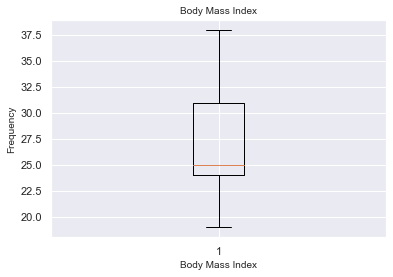

In [6]:
plt.boxplot(df['Body Mass Index'])
plt.xlabel('Body Mass Index', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('Body Mass Index', fontsize = 10)

plt.show()

The plot above showing median of the BMI is 25. 50% of bmi ranges from 24 to 31

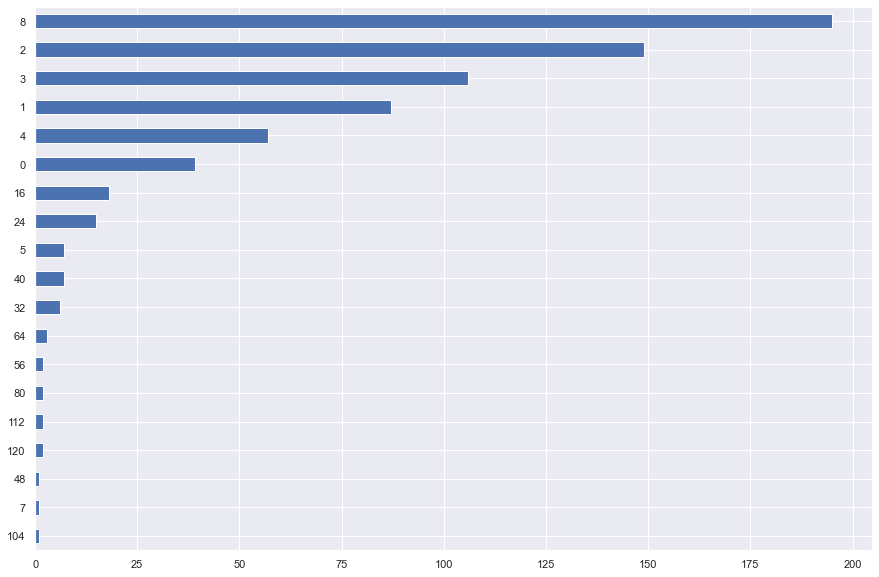

In [31]:
#plot bar plot to see how many absenteeism hours.
df['Absenteeism Time in Hours'].value_counts().sort_values(ascending=True).plot(kind = 'barh', figsize=(15,10))
plt.show()

8 hours is most hour employee absent for work

### Extract the month and weekday from Date feature

In [93]:
month = []
for i in range(df.shape[0]):
    month.append(df['Date'][i].month)

In [94]:
df['Month'] = month

In [95]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [8]:
df['Day of the Week'] = df['Date'].apply(date_to_weekday)

In [96]:
#drop Date column as we don't need this columns anymore
df = df.drop(['Date'], axis = 1)
df.head()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month
0,26,289,36,33,239.554,30,1,2,1,4,7
1,0,118,13,50,239.554,31,1,1,0,0,7
2,23,179,51,38,239.554,31,1,0,0,2,7
3,7,279,5,39,239.554,24,1,2,0,4,7
4,23,289,36,33,239.554,30,1,2,1,2,7


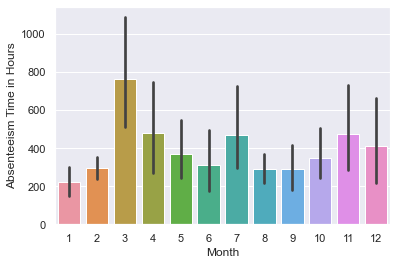

In [10]:
sns.barplot(x=df['Month'], y=df['Absenteeism Time in Hours'], estimator=sum)
plt.show()

The bar plot shows March is highest a month that employee absence for work. This is might be summer started, and some health problems also started.

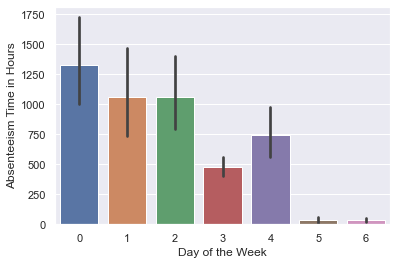

In [11]:
sns.barplot(x=df['Day of the Week'], y=df['Absenteeism Time in Hours'], estimator=sum)
plt.show()

The bar plot shows Monday, Tuesday and Wednesday are top 3 weekdays employee often absence for work 

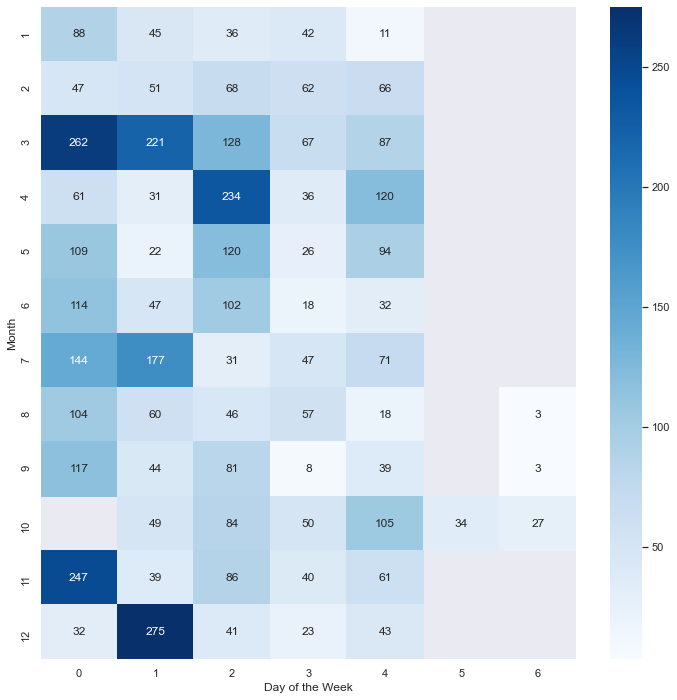

In [12]:
#heatmap shows Month and Weekday vs Absenteeism hours
plt.figure(figsize=(12,12))
sns.heatmap(df.groupby(['Month', 'Day of the Week'])['Absenteeism Time in Hours'].sum().unstack()[0:12],
            annot=True, fmt ='g', cmap='Blues')
plt.show()

In [13]:
#let assume if employee absent from work more than 3 hours is Exccessive absenteeism, less than 3 hours is moderate absenteeism
target = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(), 1, 0)

In [14]:
df['Target'] = target

In [15]:
df.head()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of the Week,Target
0,11,26,289,36,33,239.554,30,1,2,1,4,7,1,1
1,36,0,118,13,50,239.554,31,1,1,0,0,7,1,0
2,3,23,179,51,38,239.554,31,1,0,0,2,7,2,0
3,7,7,279,5,39,239.554,24,1,2,0,4,7,3,1
4,11,23,289,36,33,239.554,30,1,2,1,2,7,3,0


In [16]:
target.sum()/target.shape

array([0.45571429])

In [17]:
df_target = df.drop('Absenteeism Time in Hours', axis = 1)

In [18]:
df_target.head()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day of the Week,Target
0,11,26,289,36,33,239.554,30,1,2,1,7,1,1
1,36,0,118,13,50,239.554,31,1,1,0,7,1,0
2,3,23,179,51,38,239.554,31,1,0,0,7,2,0
3,7,7,279,5,39,239.554,24,1,2,0,7,3,1
4,11,23,289,36,33,239.554,30,1,2,1,7,3,0


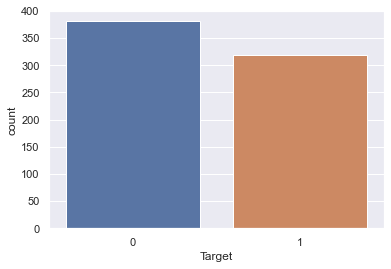

In [19]:
sns.countplot(x='Target',data = df)
plt.show()

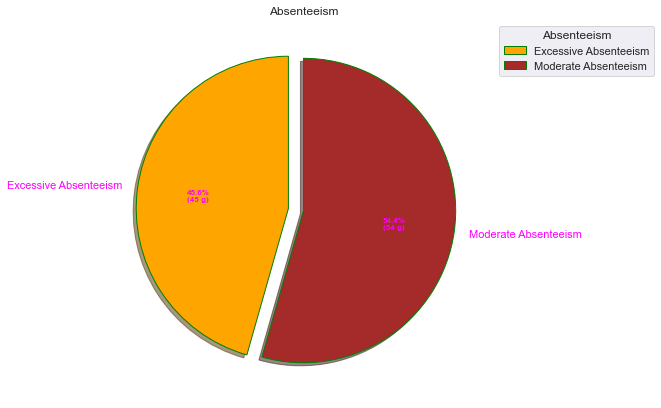

In [20]:
# plot the percentage of target which are Excessive hours and Moderate hours in Absenteeism
label = ['Excessive Absenteeism', 'Moderate Absenteeism'] 
data = [45.6, 54.4] 
explode = (0.1, 0.0) 
colors = ( "orange", "brown") 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 

ax.legend(wedges, label,
          title ="Absenteeism",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Absenteeism")
plt.show()

In [53]:
df['Distance to Work'].median()

26.0

In [54]:
df['Distance to Work'].min()

5

In [55]:
df['Distance to Work'].max()

52

/Users/hothanhphong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


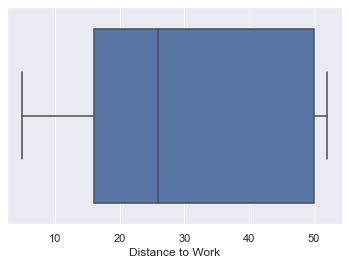

In [56]:
sns.boxplot(df['Distance to Work'])
plt.show()

## 3. Hypothesis Testing

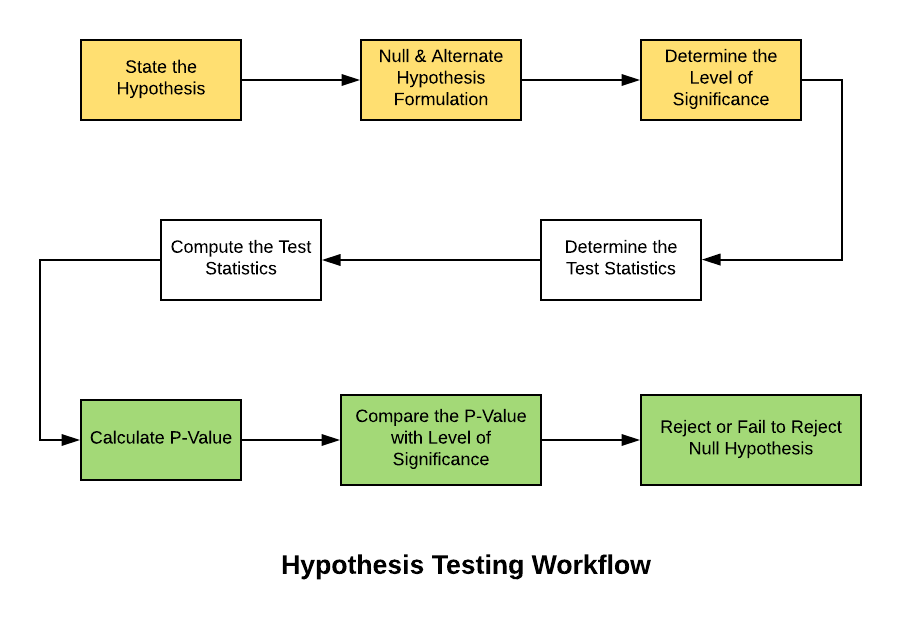

### 3.1 Define Hypothesis

### Null Hypothesis (H0): There is no difference in the Absenteeism time between the near and far distance to workplace.

### Alternative Hypothesis (HA): There is a difference in the Absenteeism time between the near and far distance to workplace.


In [23]:
#let assume employee live under 26km from workplace is near distance and more than 26km is far distance
near_distance = df_target[df_target['Distance to Work'] <= 26].sample(150, random_state=42)
far_distance = df_target[df_target['Distance to Work'] > 26].sample(150, random_state=42)

In [24]:
near_distance['Target'].value_counts()

0    87
1    63
Name: Target, dtype: int64

In [25]:
far_distance['Target'].value_counts()

1    80
0    70
Name: Target, dtype: int64

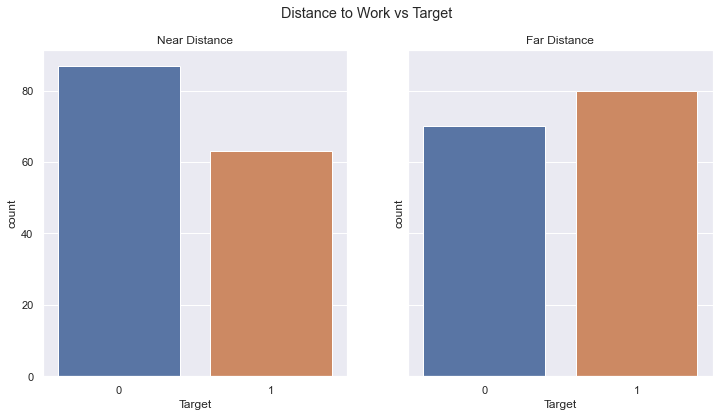

In [50]:
fig, axes = plt.subplots(1,2, figsize=(12, 6), sharey=True)

fig.suptitle('Distance to Work vs Target')

sns.countplot(ax=axes[0], x= near_distance['Target'])
axes[0].set_title('Near Distance')
sns.countplot(ax=axes[1],x = far_distance['Target'])
axes[1].set_title('Far Distance')
plt.show()

### 3.2 Level of Significance

In [60]:
alpha = 0.05

In [61]:
N = 150
a = near_distance['Target']
b = far_distance['Target']

In [62]:
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

In [63]:
s = np.sqrt((var_a + var_b)/2)

In [64]:
t = (a.mean() - b.mean()) / (s * np.sqrt(2 / N))
t

-1.9712993474426175

### 3.3 Compute T-test and p-value

In [65]:
from scipy import stats

In [66]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)

In [67]:
print("t = " + str(t))
print("p = " + str(2*p))

t = -1.9712993474426175
p = 0.049614600490969205


In [68]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [69]:
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))


print_sig(p2, alpha)

t = -1.971299347442617
p = 0.04961460049096922
We reject our null hypothesis.


### Null Hypothesis (H0): There is no difference in the Absenteeism time between the low and high expense to travel to workplace.

### Alternative Hypothesis (HA): There is a difference in the Absenteeism time between the low and high expense to travel to workplace.

In [51]:
df_target['Transportation Expense'].median()

225.0

In [52]:
df_target['Transportation Expense'].max()

388

In [53]:
df_target['Transportation Expense'].min()

118

In [54]:
#let assume employee spend under 225 USD for travel to workplace is less expense and more than 225USD is more expense.
less_expense = df_target[df_target['Transportation Expense'] <= 225].sample(200, random_state=42)
more_expense = df_target[df_target['Transportation Expense'] > 225].sample(200, random_state=42)

In [55]:
less_expense['Target'].value_counts()

0    136
1     64
Name: Target, dtype: int64

In [56]:
more_expense['Target'].value_counts()

1    124
0     76
Name: Target, dtype: int64

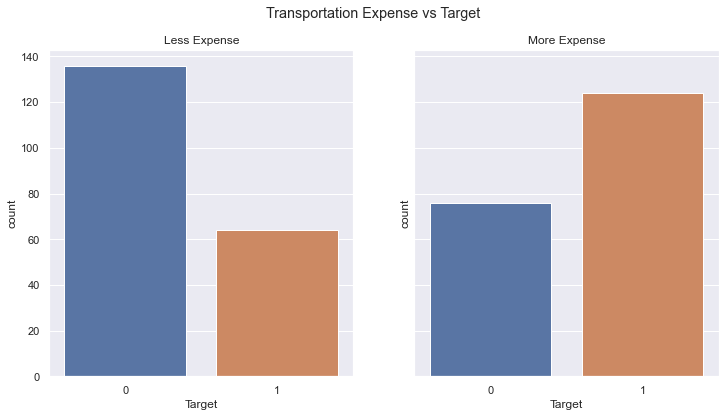

In [57]:
fig, axes = plt.subplots(1,2, figsize=(12, 6), sharey=True)

fig.suptitle('Transportation Expense vs Target')

sns.countplot(ax=axes[0], x= less_expense['Target'])
axes[0].set_title('Less Expense')
sns.countplot(ax=axes[1],x = more_expense['Target'])
axes[1].set_title('More Expense')
plt.show()

In [76]:
N = 200
x = less_expense['Target']
y = more_expense['Target']

In [77]:
t3, p3 = stats.ttest_ind(x,y)
print("t = " + str(t3))
print("p = " + str(p3))


print_sig(p3, alpha)

t = -6.2864120267018455
p = 8.547685104806746e-10
We reject our null hypothesis.


### Null Hypothesis (H0): There is no difference in the Absenteeism time between the disease reasons and non-disease reasons.
### Alternative Hypothesis (HA): There is a difference in the Absenteeism time between the disease reasons and non-disease reasons.

In [60]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [61]:
Excessive_Hour = np.where(data['Absenteeism Time in Hours'] > data['Absenteeism Time in Hours'].median(), 1, 0)

In [62]:
data['Excessive_Hour'] = Excessive_Hour

In [63]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive_Hour
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,1
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0


In [64]:
data_target = data.drop('Absenteeism Time in Hours', axis = 1)
data_target.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive_Hour
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,1
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,0
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,1
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,0


In [98]:
#reasons from 1-14 is related to diseases, 15 - 28 is related to non-diseases
reason_disease = data_target[data_target['Reason for Absence'] <= 14].sample(200, random_state=42)
reason_nondisease = data_target[data_target['Reason for Absence'] > 14].sample(200, random_state=42)

In [66]:
reason_disease['Excessive_Hour'].value_counts()

1    121
0     79
Name: Excessive_Hour, dtype: int64

In [67]:
reason_nondisease['Excessive_Hour'].value_counts()

0    124
1     76
Name: Excessive_Hour, dtype: int64

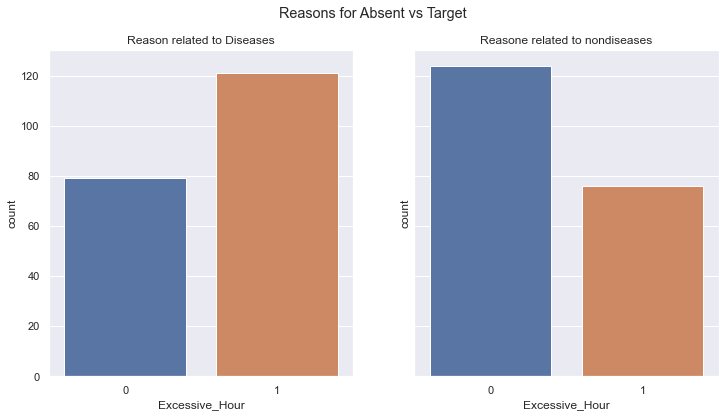

In [68]:
fig, axes = plt.subplots(1,2, figsize=(12, 6), sharey=True)

fig.suptitle('Reasons for Absent vs Target')

sns.countplot(ax=axes[0], x= reason_disease['Excessive_Hour'])
axes[0].set_title('Reason related to Diseases')
sns.countplot(ax=axes[1],x = reason_nondisease['Excessive_Hour'])
axes[1].set_title('Reasone related to nondiseases')
plt.show()

In [126]:
N = 200
e = reason_disease['Excessive_Hour']
f = reason_nondisease['Excessive_Hour']

In [127]:
t5, p5 = stats.ttest_ind(e,f)
print("t = " + str(t5))
print("p = " + str(p5))


print_sig(p5, alpha)

t = 4.6074075338187495
p = 5.497664640181139e-06
We reject our null hypothesis.


## 4. Summary
   ### Key findings:
      - Employee living far from workplace is more likely to absent from work
      - Employee who spend more expense for travle to work is also likely to absent from work
      - The reasons for absence related to diseases would spend more hour absent than reasons related to non-diseases.
      - Employee with no children and 2 children will take leave more than employee with 3 or 4 children
      - Employee with higher level of education will take less leave more than employee with highschool level education
      - Employee with no pet will take leave more than employee with 1, 2, 3 or 4 pets
      - Employee with  and 2 children will take leave more than employee with 3 or 4 children
      - The age of 28 and 33 to 38 are the most group of age likely to absent at work this maybe because they have to take care of their children or have problems with health.

## 5. Future Work
   ### + Analysis other features to be more accuracy for predict absenteeism hours purposes.
   ### + Use logistic regression model to classify the target.
   ### + Collect more data to be able to get better analysis
   
   